In [1]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [2]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [4]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

killings.rename(columns = {'lawenforcementagency': 'agency', 'raceethnicity': 'race'}, inplace = True)
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [5]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [7]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.fillna(value = 'Unknown', inplace = True)
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [156]:
# 4. How many killings were there so far in 2015?
killings.head()
killings[killings.year == 2015]['name'].count()

467

In [154]:
# 5. Of all killings, how many were male and how many female?
killings.head()
killings.groupby('gender')['name'].count()

gender
Female     22
Male      445
Name: name, dtype: int64

In [155]:
# 6. How many killings were of unarmed people?
killings.head()
killings[killings.armed == 'No']['name'].count()

102

In [153]:
# 7. What percentage of all killings were unarmed?
killings.groupby('armed')['name'].count()
unarmed = killings[killings.armed == 'No']['name'].count()
armed = killings[killings.armed <> 'No']['name'].count()
print unarmed
print armed
unarmed_percentage = (float(unarmed)/armed)*100
print unarmed_percentage

102
365
27.9452054795


In [152]:
# 8. What are the 5 states with the most killings?
killings.head()
killings.groupby('state')['name'].count().order(ascending = False).head(5)

state
CA    74
TX    46
FL    29
AZ    25
OK    22
Name: name, dtype: int64

In [151]:
# 9. Show a value counts of deaths for each race
killings.groupby('race')['name'].count()

,Unnamed: 0,name,age,gender,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
race,,,,,,,,,,,,,,
Asian/Pacific Islander,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Black,135,135,135,135,135,135,135,135,135,135,135,135,135,135
Hispanic/Latino,67,67,67,67,67,67,67,67,67,67,67,67,67,67
Native American,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Unknown,15,15,15,15,15,15,15,15,15,15,15,15,15,15
White,236,236,236,236,236,236,236,236,236,236,236,236,236,236


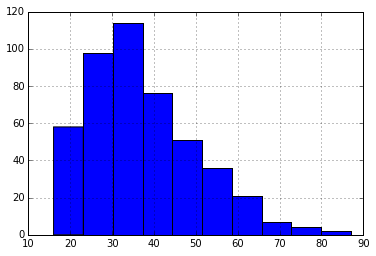

In [136]:
# 10. Display a histogram of ages of all killings
%matplotlib inline

#print killings.groupby('age')['age'].count().order().tail()

killings['age'].hist()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d2a4e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117b39b90>]], dtype=object)

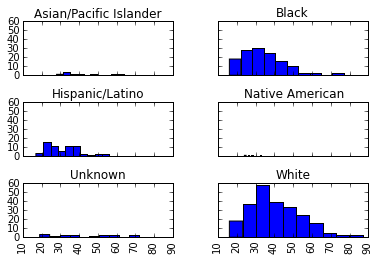

In [111]:
# 11. Show 6 histograms of ages by race
killings['age'].hist(by = killings.race, sharex = True, sharey = True)

In [115]:
# 12. What is the average age of death by race?
killings['age'].groupby(killings.race).mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

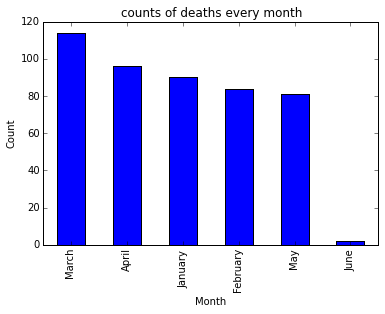

In [148]:
# 13. Show a bar chart with counts of deaths every month
import numpy as np
import matplotlib.pyplot as plt

#bar chart
killings['month'].value_counts().plot(kind='bar', title = 'counts of deaths every month')
# Add labels
plt.xlabel('Month')
plt.ylabel('Count')

killings['month'].value_counts() # This is to test the bar chart 





In [ ]:
###################
### Less Morbid ###
###################

In [402]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()


,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [403]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

#majors.drop(['Employed_full_time_year_round', 'Major_code'], axis = 1, inplace = True) # Not sure why it didn't work
majors.drop(majors[[1, 6]], axis = 1, inplace = True)
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000


In [198]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [206]:
# 3. What are the top 10 highest paying majors?
majors[['Major', 'Median']].sort_index(by = "Median", ascending = False).head(10)


,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


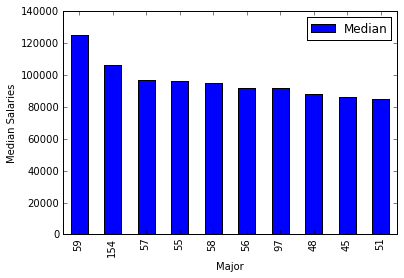

In [407]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
# majors[['Major', 'Median']].sort_values(by = "Median", ascending = False).head(10).plot(kind = 'bar') # sort_values() is throwing error
majors[['Major', 'Median']].sort_index(by = "Median", ascending = False).head(10).plot(kind = 'bar')
plt.ylabel('Median Salaries')
plt.xlabel('Major')


In [220]:
# 5. What is the average median salary for each major category?
majors.groupby(majors.Major_category).Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [221]:
# 6. Show only the top 5 paying major categories
majors.groupby(majors.Major_category).Median.mean().order(ascending = False).head(5)

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f6ad90>]], dtype=object)

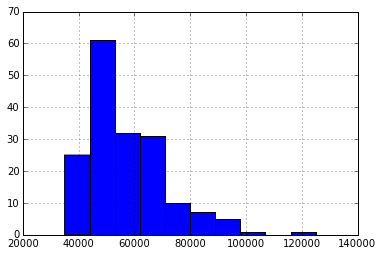

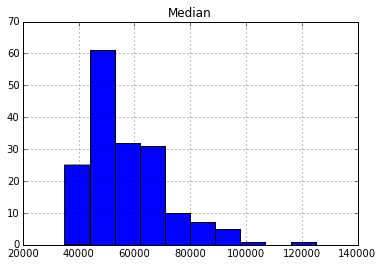

In [268]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist()


ValueError: x has only one data point. bins or range kwarg must be given

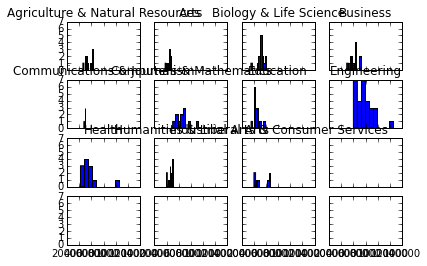

In [408]:
# 8. Plot a histogram of the distribution of median salaries by major category
# majors['Median'].groupby(majors.Major_category).count()  # testing the count
majors[['Major_category','Median']].hist(by = majors.Major_category, sharex = True, sharey = True)


In [315]:
# 9. What are the top 10 most UNemployed majors?
majors.groupby(majors.Major).Unemployed.sum().order(ascending = False).head(10)



Major
BUSINESS MANAGEMENT AND ADMINISTRATION    147261
GENERAL BUSINESS                           85626
PSYCHOLOGY                                 79066
ACCOUNTING                                 75379
COMMUNICATIONS                             54390
ENGLISH LANGUAGE AND LITERATURE            52248
MARKETING AND MARKETING RESEARCH           51839
POLITICAL SCIENCE AND GOVERNMENT           40376
GENERAL EDUCATION                          38742
BIOLOGY                                    36757
Name: Unemployed, dtype: int64

In [409]:
# What are the unemployment rates?
majors[['Major','Unemployment_rate']].head() # used head() to limit the output.

#totalemployed = majors.groupby(majors.Major).employed.sum()
#totalUnemployed = majors.groupby(majors.Major).Unemployed.sum()
#Unemployment_rate = totalUnemployed / (totalemployed + totalUnemployed) 





,Major,Unemployment_rate
0,GENERAL AGRICULTURE,0.026147
1,AGRICULTURE PRODUCTION AND MANAGEMENT,0.028636
2,AGRICULTURAL ECONOMICS,0.030248
3,ANIMAL SCIENCES,0.042679
4,FOOD SCIENCE,0.049188


In [410]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby(majors.Major_category).Unemployed.mean().order(ascending = False).head(10)


Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

In [372]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

majors['sample_employment_rate'] = majors.Employed / majors.Total
majors.head(2)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000,0.806338,0.193662


In [373]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = 1 - majors.sample_employment_rate
#alternatives using lamda function
#majors['sample_unemployment_rate'] = majors.sample_unemployment_rate.apply(lamda x : 1 - x)
majors.head(2)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000,0.806338,0.193662


In [ ]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [394]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
businesses.isnull().sum()
businesses.shape

(7544, 16)

In [395]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()
inspections.isnull().sum()
inspections.shape

(27285, 4)

In [396]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()
violations.isnull().sum()
violations.shape

(39720, 5)

In [436]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
#businesses
#inspections
#violations

#pd.merge(businesses,inspections).head()
#pd.merge(businesses,violations).head()
inspect_violations = pd.merge(inspections, violations, 'left', on = ['business_id', 'date'])
restaurant_scores = pd.merge(inspect_violations, businesses, 'left', on = ['business_id'])



#all = {'x': businesses, 'y': inspections, 'z': violations}
#restaurant_scores = pd.concat(all)
restaurant_scores.head(2)
#restaurant_scores.shape
#inspect_violations.shape





,business_id,Score,date,type,ViolationTypeID,risk_category,description,name,address,city,...,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,NaN,20140807,Reinspection/Followup,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,10,94,20140729,Routine - Unscheduled,103129,Moderate Risk,Insufficient hot water or running water,Tiramisu Kitchen,033 Belden Pl,San Francisco,...,-122.403816,NaN,H24,779059,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104


In [431]:
# 2 Which ten business have had the most inspections?
#restaurant_scores.groupby(restaurant_scores.name).count().sort(ascending = False).head()
#restaurant_scores.isnull().sum()
restaurant_scores.name.value_counts().head(10)


Peet's Coffee & Tea           151
Starbucks Coffee              100
Whole Foods Market             97
Specialty's Cafe & Bakery      88
KENTUCKY FRIED CHICKEN         80
Lers Ros Thai Noodle           78
San Francisco Soup Company     74
King of Thai Noodle House      69
Cafe Bakery                    67
Yama Sushi Restaurant          66
dtype: int64

In [437]:
# 3 Group and count the inspections by type
restaurant_scores.groupby(restaurant_scores.type).Score.count().order(ascending = False)

type
Routine - Unscheduled                41798
Reinspection/Followup                    3
Structural Inspection                    0
Special Event                            0
Routine - Scheduled                      0
Non-inspection site visit                0
New Ownership                            0
New Construction                         0
Multi-agency Investigation               0
Foodborne Illness Investigation          0
Complaint Reinspection/Followup          0
Complaint                                0
Administrative or Document Review        0
Name: Score, dtype: int64

In [462]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

restaurant_scores.date.dtypes
from datetime import datetime
#date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
#s = date.strftime("%Y%m%d")
#restaurant_scores['newdate'] = 
restaurant_scores.date.apply(lambda x: restaurant_scores.newdate.strptime(str(x), '%Y%m%d'))

#date2 = datetime(restaurant_scores.date)
#restaurant_scores['newDate'] = restaurant_scores.date2.strftime("%Y%m%d")

#restaurant_scores['newDate'] = datetime(year=restaurant_scores.date[0:4], month=restaurant_scores.date[4:6], day=restaurant_scores.date[6:7])


#restaurant_scores['Newdate'] = restaurant_scores.date.apply(lambda x: Newdate.strftime('%Y%m%d'))
#restaurant_scores['month'] = restaurant_scores.date.apply(lambda x: x.strftime("%B"))
#restaurant_scores.head()
#restaurant_scores.date[0:4]
#restaurant_scores.date





AttributeError: 'DataFrame' object has no attribute 'newdate'

dtype('int64')

In [471]:
# 5 Which zip code contains the most high risk violations?

restaurant_scores.columns
restaurant_scores.owner_zip.value_counts().head(1)

94110    4390
dtype: int64

In [476]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
restaurant_scores.type.unique()
restaurant_scores[restaurant_scores.type == 'New Ownership'].risk_category.value_counts()

Low Risk         553
Moderate Risk    419
High Risk        148
dtype: int64

In [479]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3751
dtype: int64

In [513]:
# 8 What street has the best (safest) restaurants to dine out at?

restaurant_scores.columns
restaurant_scores.address.isnull().sum()
restaurant_scores.address.fillna(value='Unknown', inplace = True)
restaurant_scores.address.isnull().sum()
restaurant_scores.address[restaurant_scores.risk_category == 'Low Risk'].value_counts().head(1)


#import re
#address = restaurant_scores.address
#pattern = re.compile("\d+")
#s = re.search(pattern, address)
#  #street = []
#def street(x):
#    if type(x) == str:
#        s = re.search(pattern, address)
#        if s.group() > 1:
#            #street = append.street(s.group())
#            return s.group()

#restaurant_scores['street'] == restaurant_scores.street(addresss)
#restaurant_scores.street[[restaurant_scores.risk_category == 'Low Risk'].value_counts().head(1)
            



 Off The Grid      156
dtype: int64

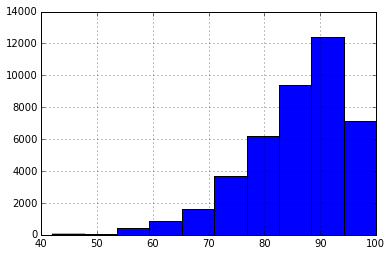

In [503]:
# 9 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins = 10)

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/